In [1]:
import torch

import torchvision

import torchvision.transforms as transforms

from torch.utils.data import DataLoader, Dataset

import numpy as np

import matplotlib.pyplot as plt




transform = transforms.Compose([

    transforms.ToTensor(),

])



train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)


# Function to convert grayscale to RGB and assign colors

def colored_mnist(dataset):

    colored_data = []

    colored_labels = []

    # Define a color palette for digits 0-9

    colors = [

        [1, 0, 0],    # Red

        [0, 1, 0],    # Green

        [0, 0, 1],    # Blue

        [1, 1, 0],    # Yellow

        [1, 0, 1],    # Magenta

        [0, 1, 1],    # Cyan

        [0.5, 0.5, 0],# Olive

        [0.5, 0, 0.5],# Purple

        [0, 0.5, 0.5],# Teal

        [0.5, 0.5, 0.5] # Gray

    ]

    

    for img, label in dataset:

        img = img.squeeze(0)  # Remove channel dimension

        colored_img = torch.stack([img * colors[label][0],

                                   img * colors[label][1],

                                   img * colors[label][2]], dim=0)

        colored_data.append(colored_img)

        colored_labels.append(label)

        

    return torch.stack(colored_data), torch.tensor(colored_labels)



# Apply to training and test datasets

train_data, train_labels = colored_mnist(train_dataset)

test_data, test_labels = colored_mnist(test_dataset)


print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 16004914.86it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 469479.98it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 4405885.09it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 4780559.29it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Train data shape: torch.Size([60000, 3, 28, 28])
Test data shape: torch.Size([10000, 3, 28, 28])


In [2]:
import torch
import zipfile
import os

# Define file names
train_data_file = 'train_data.pt'
train_labels_file = 'train_labels.pt'
test_data_file = 'test_data.pt'
test_labels_file = 'test_labels.pt'
zip_filename = 'colored_mnist.zip'

# Save the tensors to .pt files
torch.save(train_data, train_data_file)
torch.save(train_labels, train_labels_file)
torch.save(test_data, test_data_file)
torch.save(test_labels, test_labels_file)

print("Saved train and test datasets as .pt files.")

# Create a ZIP file containing all .pt files
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    zipf.write(train_data_file)
    zipf.write(train_labels_file)
    zipf.write(test_data_file)
    zipf.write(test_labels_file)

print(f"All files zipped into {zip_filename}.")

# Optionally, remove the individual .pt files after zipping
os.remove(train_data_file)
os.remove(train_labels_file)
os.remove(test_data_file)
os.remove(test_labels_file)

print("Individual .pt files removed. Dataset is zipped and ready for download.")



Saved train and test datasets as .pt files.
All files zipped into colored_mnist.zip.
Individual .pt files removed. Dataset is zipped and ready for download.


In [36]:
train_data_file = 'train_data.pt'
train_labels_file = 'train_labels.pt'
test_data_file = 'test_data.pt'
test_labels_file = 'test_labels.pt'
zip_filename = 'colored_mnist.zip'

# Path to the ZIP file
zip_path = '/kaggle/working/' + zip_filename  # Adjust the path if your ZIP is in a different directory

# Check if the ZIP file exists
if not os.path.exists(zip_path):
    raise FileNotFoundError(f"{zip_filename} not found in /kaggle/working/. Please ensure the ZIP file is uploaded.")

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zipf:
    zipf.extractall('/kaggle/working/')  # Extract to the working directory

print(f"Extracted {zip_filename}.")

# Load the tensors from .pt files
train_data = torch.load(os.path.join('/kaggle/working/', train_data_file))
train_labels = torch.load(os.path.join('/kaggle/working/', train_labels_file))
test_data = torch.load(os.path.join('/kaggle/working/', test_data_file))
test_labels = torch.load(os.path.join('/kaggle/working/', test_labels_file))

print("Loaded train and test datasets from the ZIP file.")

# Optionally, remove the extracted .pt files after loading
os.remove(os.path.join('/kaggle/working/', train_data_file))
os.remove(os.path.join('/kaggle/working/', train_labels_file))
os.remove(os.path.join('/kaggle/working/', test_data_file))
os.remove(os.path.join('/kaggle/working/', test_labels_file))

print("Individual .pt files removed after loading.")


Extracted colored_mnist.zip.


/tmp/ipykernel_30/2492188801.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_data = torch.load(os.path.join('/kaggle/working/', train_data_file))


Loaded train and test datasets from the ZIP file.
Individual .pt files removed after loading.


/tmp/ipykernel_30/2492188801.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_labels = torch.load(os.path.join('/kaggle/working/', train_labels_file))
/tmp/ipykern

In [37]:
print(f"Train data shape: {train_data.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"Test labels shape: {test_labels.shape}")


Train data shape: torch.Size([60000, 3, 28, 28])
Train labels shape: torch.Size([60000])
Test data shape: torch.Size([10000, 3, 28, 28])
Test labels shape: torch.Size([10000])


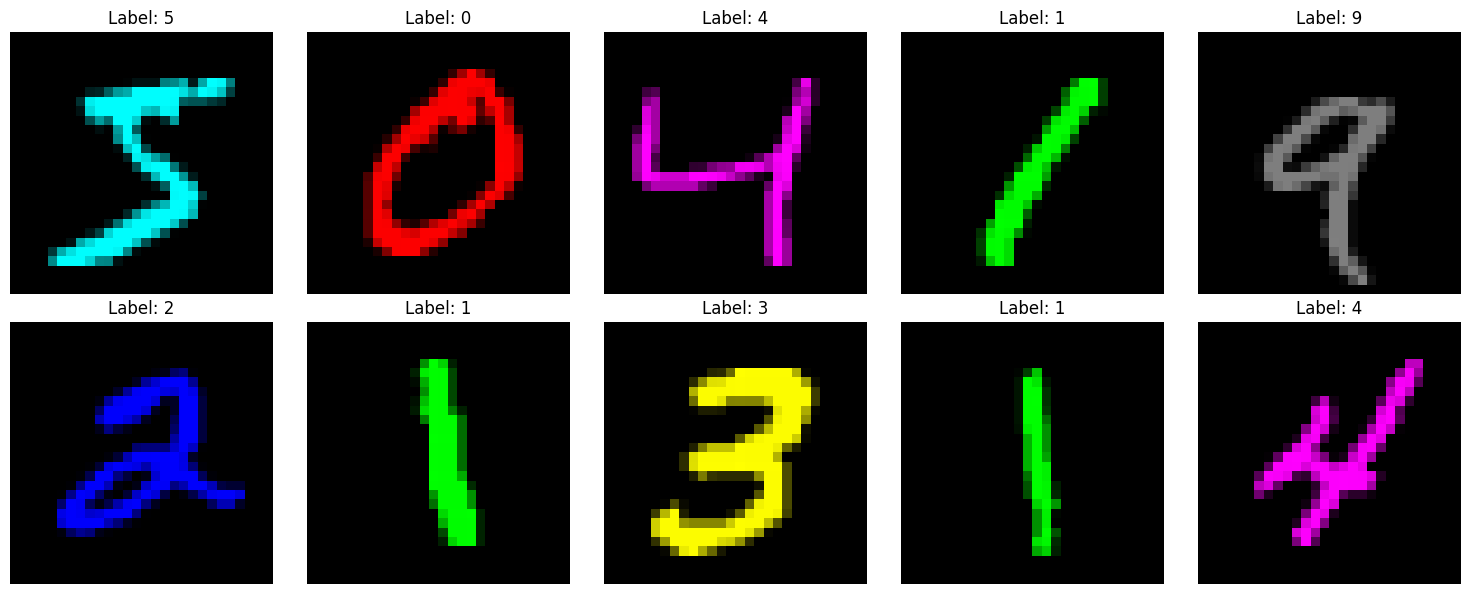

In [38]:
# Plot some samples

fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i, ax in enumerate(axs.flat):

    ax.imshow(train_data[i].permute(1, 2, 0).numpy())

    ax.set_title(f"Label: {train_labels[i].item()}")

    ax.axis('off')

plt.tight_layout()

plt.show()


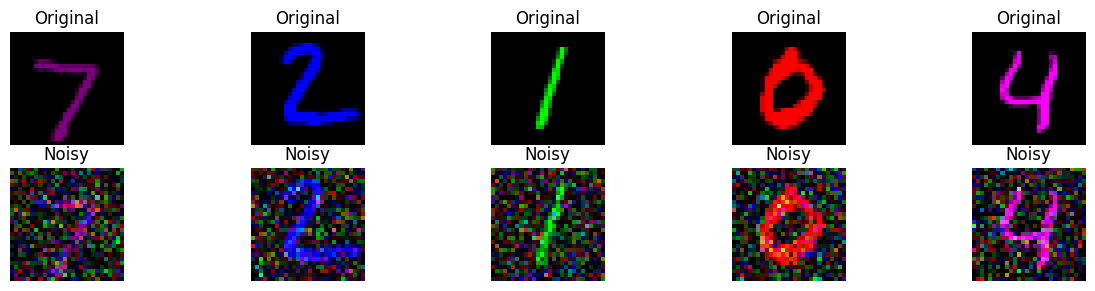

In [41]:
def add_gaussian_noise(images, sigma=0.1):

    noise = torch.randn_like(images) * sigma

    noisy_images = images + noise

    noisy_images = torch.clamp(noisy_images, 0., 1.)

    return noisy_images



# Add noise to training and test data

sigma = 0.3  # Adjust noise level as needed

train_noisy = add_gaussian_noise(train_data, sigma)

test_noisy = add_gaussian_noise(test_data, sigma)



# Visualize some examples

def show_images(original, noisy, denoised=None, num=5):

    plt.figure(figsize=(15, 5))

    for i in range(num):

        # Original

        ax = plt.subplot(3, num, i + 1)

        plt.imshow(original[i].permute(1, 2, 0).numpy())

        plt.title("Original")

        plt.axis('off')

        

        # Noisy

        ax = plt.subplot(3, num, i + 1 + num)

        plt.imshow(noisy[i].permute(1, 2, 0).numpy())

        plt.title("Noisy")

        plt.axis('off')

        

        # Denoised (if provided)

        if denoised is not None:

            ax = plt.subplot(3, num, i + 1 + 2*num)

            plt.imshow(denoised[i].permute(1, 2, 0).detach().cpu().numpy())

            plt.title("Denoised")

            plt.axis('off')

    plt.show()



# Initially, denoised is None

show_images(test_data, test_noisy)


In [42]:
import torch

import torch.nn as nn

import torch.nn.functional as F

import torch.optim as optim


class Autoencoder(nn.Module):

    def __init__(self):

        super(Autoencoder, self).__init__()

        # Encoder

        self.encoder = nn.Sequential(

            nn.Conv2d(3, 128, kernel_size=3, stride=2, padding=1),  # [128,14,14]

            nn.ReLU(True),

            nn.Conv2d(128, 64, kernel_size=3, stride=2, padding=1), # [64,7,7]

            nn.ReLU(True),

            nn.Conv2d(64, 32, kernel_size=3, stride=2, padding=1),  # [32,4,4]

            nn.ReLU(True),

            nn.Conv2d(32, 16, kernel_size=3, stride=2, padding=1),  # [16,2,2]

            nn.ReLU(True)

        )

        # Decoder

        self.decoder = nn.Sequential(

            nn.ConvTranspose2d(16, 32, kernel_size=3, stride=2, padding=1, output_padding=1),  # [32,4,4]

            nn.ReLU(True),

            nn.ConvTranspose2d(32, 64, kernel_size=3, stride=2, padding=1, output_padding=1),  # [64,8,8]

            nn.ReLU(True),

            nn.ConvTranspose2d(64, 128, kernel_size=3, stride=2, padding=1, output_padding=1), # [128,16,16]

            nn.ReLU(True),

            nn.ConvTranspose2d(128, 3, kernel_size=3, stride=2, padding=1, output_padding=1),  # [3,32,32]

            nn.Sigmoid()  # To ensure output is between 0 and 1

        )



    def forward(self, x):

        x = self.encoder(x)

        x = self.decoder(x)

        # Interpolate to the original size (28x28)

        x = F.interpolate(x, size=(28, 28), mode='bilinear', align_corners=False)

        return x



model = Autoencoder()

print(model)


Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(128, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (7)

In [48]:
import matplotlib.pyplot as plt

# Function to show only noisy and denoised images
def show_noisy_vs_denoised(noisy, denoised, num=5, epoch=5):
    plt.figure(figsize=(10, 5))
    
    # Set the title with f-string for proper formatting
    plt.suptitle(f"Visualizing for Epoch {epoch}:", fontsize=16)
    
    for i in range(num):
        # Noisy
        ax = plt.subplot(2, num, i + 1)
        plt.imshow(noisy[i].permute(1, 2, 0).cpu().numpy())
        plt.title("Noisy")
        plt.axis('off')

        # Denoised
        ax = plt.subplot(2, num, i + 1 + num)
        plt.imshow(denoised[i].permute(1, 2, 0).cpu().numpy())
        plt.title("Denoised")
        plt.axis('off')

    plt.show()

# Function to visualize output at certain epoch
def show_noisy_vs_denoised_at_epoch(epoch, model, num=5):
    # Switch model to evaluation mode
    model.eval()

    # Choose random test images
    idx = torch.randint(0, len(test_data), (num,))
    noisy_images = test_noisy[idx]

    with torch.no_grad():
        denoised_images = model(noisy_images)

    # Plot noisy and denoised images, passing the current epoch number
    show_noisy_vs_denoised(noisy_images.cpu(), denoised_images.cpu(), num=num, epoch=epoch)


In [73]:
# Define device

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"Using device: {device}")



# Move data to device

train_noisy = train_noisy.to(device)

train_data = train_data.to(device)

test_noisy = test_noisy.to(device)

test_data = test_data.to(device)



# Define DataLoader

batch_size = 128

train_loader = DataLoader(torch.utils.data.TensorDataset(train_noisy, train_data), batch_size=batch_size, shuffle=True)

test_loader = DataLoader(torch.utils.data.TensorDataset(test_noisy, test_data), batch_size=batch_size, shuffle=False)



# Move model to device

model = model.to(device)



# Define loss and optimizer

criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

# Training Loop with visualization every 2 epochs
num_epochs = 20
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for data in train_loader:
        inputs, targets = data
        inputs = inputs.to(device)
        targets = targets.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)

    # Evaluation on test set
    model.eval()
    test_running_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            inputs, targets = data
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_running_loss += loss.item() * inputs.size(0)

    test_epoch_loss = test_running_loss / len(test_loader.dataset)
    test_losses.append(test_epoch_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.6f}, Test Loss: {test_epoch_loss:.6f}")

    # Visualize only noisy and denoised images every 2 epochs
    if (epoch + 1) % 2 == 0:
        show_noisy_vs_denoised_at_epoch(epoch + 1, model)




Using device: cuda
Epoch [1/20], Train Loss: 0.003743, Test Loss: 0.003604


KeyboardInterrupt: 

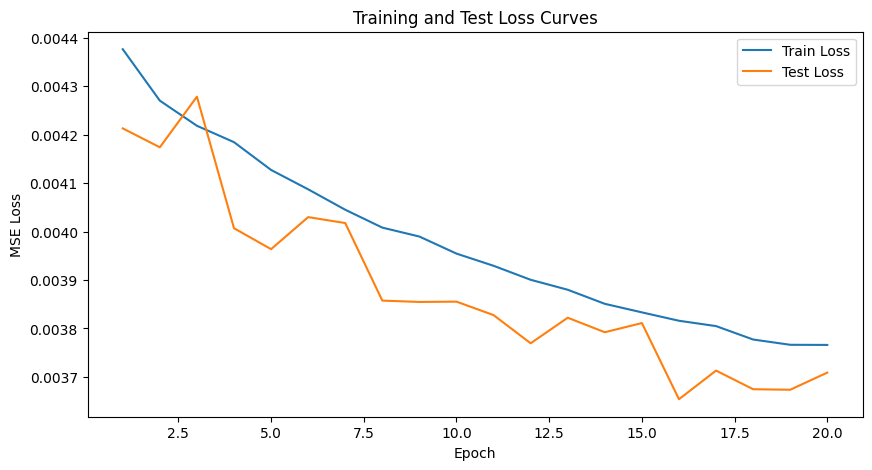

In [51]:
# Plot Loss Curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training and Test Loss Curves')
plt.legend()
plt.show()

In [52]:
def calculate_snr(original, denoised):

    # Flatten the images

    original = original.view(original.size(0), -1)

    denoised = denoised.view(denoised.size(0), -1)

    noise = original - denoised

    # Compute power

    signal_power = torch.mean(original ** 2, dim=1)

    noise_power = torch.mean(noise ** 2, dim=1)

    snr = 10 * torch.log10(signal_power / noise_power)

    return snr.mean().item()



# Calculate SNR on test set

model.eval()

total_snr = 0.0

total_mse = 0.0

with torch.no_grad():

    for data in test_loader:

        inputs, targets = data

        inputs = inputs.to(device)

        targets = targets.to(device)

        outputs = model(inputs)

        snr = calculate_snr(targets, outputs)

        total_snr += snr * inputs.size(0)

        mse = criterion(outputs, targets)

        total_mse += mse.item() * inputs.size(0)

avg_snr = total_snr / len(test_loader.dataset)

avg_mse = total_mse / len(test_loader.dataset)



print(f"Average SNR on Test Set: {avg_snr:.2f} dB")

print(f"Average MSE on Test Set: {avg_mse:.6f}")


Average SNR on Test Set: 10.27 dB
Average MSE on Test Set: 0.003709


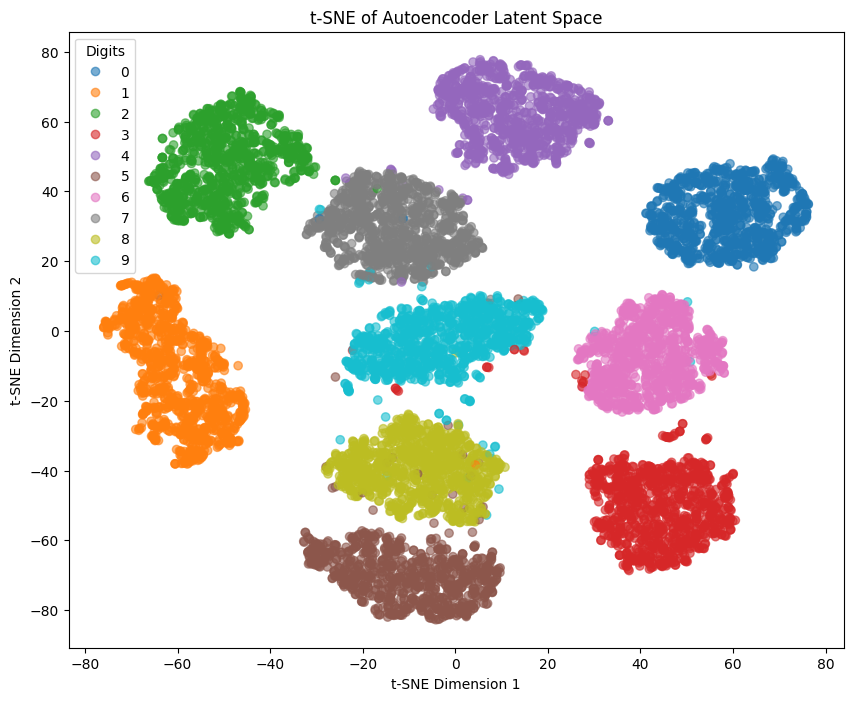

In [53]:
from sklearn.manifold import TSNE


i = 0 
def get_latent_vectors(model, data_loader):

    model.eval()

    latent_vectors = []

    labels_list = []

    with torch.no_grad():

        for data in data_loader:

            inputs, targets, labels = data  # Unpack all three elements

            inputs = inputs.to(device)

            encoded = model.encoder(inputs)

            encoded = encoded.view(encoded.size(0), -1)  # Flatten

            latent_vectors.append(encoded.cpu().numpy())

            labels_list.append(labels.numpy())

    latent_vectors = np.concatenate(latent_vectors, axis=0)

    labels_list = np.concatenate(labels_list, axis=0)

    return latent_vectors, labels_list





# Create a DataLoader with labels

test_loader_with_labels = DataLoader(torch.utils.data.TensorDataset(test_noisy, test_data, test_labels), batch_size=batch_size, shuffle=False)



# Get latent vectors and labels

latent_vectors, labels = get_latent_vectors(model, test_loader_with_labels)



# Apply t-SNE

tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)

latent_tsne = tsne.fit_transform(latent_vectors)



# Plot t-SNE

plt.figure(figsize=(10,8))

scatter = plt.scatter(latent_tsne[:,0], latent_tsne[:,1], c=labels, cmap='tab10', alpha=0.6)

plt.legend(*scatter.legend_elements(), title="Digits")

plt.title('t-SNE of Autoencoder Latent Space')

plt.xlabel('t-SNE Dimension 1')

plt.ylabel('t-SNE Dimension 2')

plt.show()


In [54]:
# Let's check the shape of the latent space produced by the encoder
sample_input = torch.randn(1, 3, 28, 28).to(device)  # Example input (batch size 1)
latent_output = model.encoder(sample_input)
print(f"Latent space shape: {latent_output.shape}")


Latent space shape: torch.Size([1, 16, 2, 2])


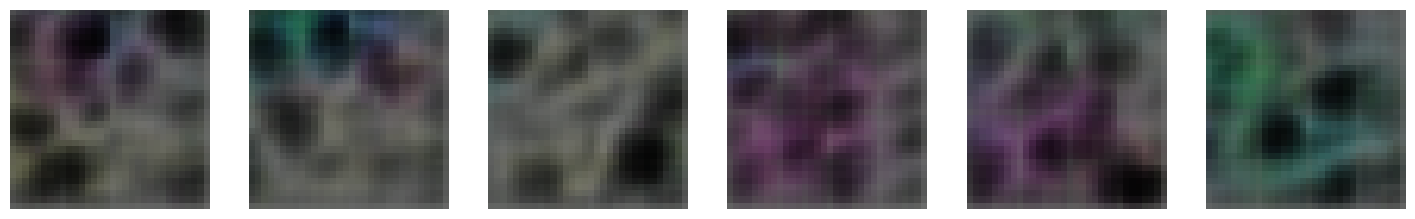

In [56]:
import torch
import matplotlib.pyplot as plt
torch.manual_seed(11)

def sample_and_decode(model, n_samples=5, device='cpu'):
    model.eval()  # Set model to evaluation mode

    # Define the latent space shape based on the encoder output (e.g., 16x2x2)
    latent_shape = (n_samples, 16, 2, 2)  # Adjust based on your encoder output shape

    # Generate random latent vectors
    random_latent_vectors = torch.randn(latent_shape).to(device)

    # Decode the latent vectors to generate images
    with torch.no_grad():
        generated_images = model.decoder(random_latent_vectors).cpu()

    # Plot the generated images
    fig, axes = plt.subplots(1, n_samples, figsize=(n_samples * 3, 3))
    for i, ax in enumerate(axes):
        ax.imshow(generated_images[i].permute(1, 2, 0))  # Convert to (H, W, C)
        ax.axis('off')  # Hide axis
    plt.show()

# Call the function to sample from latent space and decode images
sample_and_decode(model, n_samples=6, device=device)


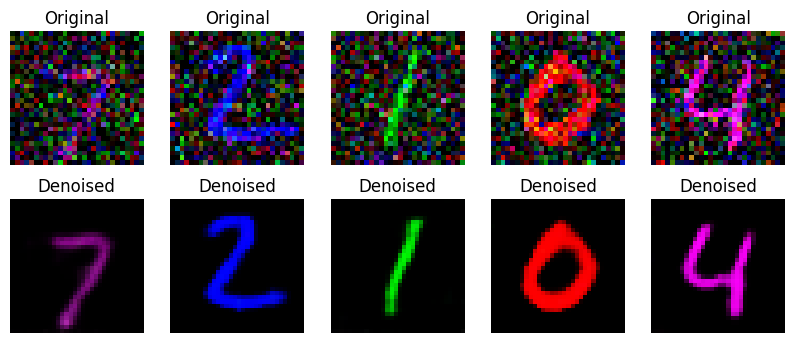

In [57]:
import torch
import matplotlib.pyplot as plt

def reconstruct_from_latent_space(model, data_loader, n_samples=5, device='cpu'):
    model.eval()
    data_iter = iter(data_loader)
    images, _ = next(data_iter)  # Get a batch of images
    images = images[:n_samples].to(device)  # Take only the first n_samples images

    # Pass through encoder to get latent representations
    with torch.no_grad():
        latent_vectors = model.encoder(images)
        reconstructed_images = model.decoder(latent_vectors).cpu()

    # Plot the original and reconstructed images
    fig, axes = plt.subplots(2, n_samples, figsize=(n_samples * 2, 4))

    for i in range(n_samples):
        # Plot original images
        axes[0, i].imshow(images[i].cpu().permute(1, 2, 0))  # Convert from (C, H, W) to (H, W, C)
        axes[0, i].axis('off')
        axes[0, i].set_title('Original')

        # Plot reconstructed images
        axes[1, i].imshow(reconstructed_images[i].permute(1, 2, 0))  # Convert from (C, H, W) to (H, W, C)
        axes[1, i].axis('off')
        axes[1, i].set_title('Denoised')

    plt.show()

# Use test_loader to reconstruct from latent space
reconstruct_from_latent_space(model, test_loader, n_samples=5, device=device)


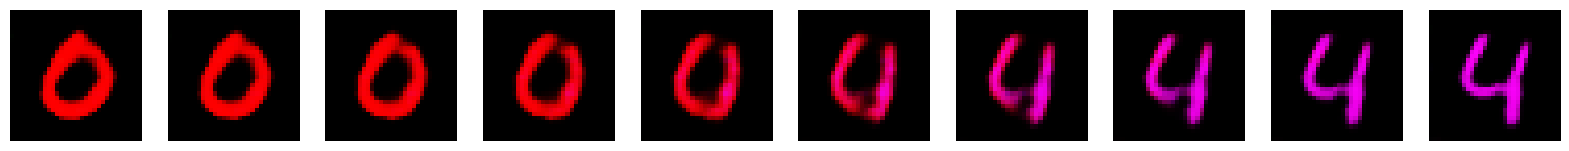

In [58]:
import numpy as np

def interpolate_latent_space(model, data_loader, n_samples=5, device='cpu'):
    model.eval()
    data_iter = iter(data_loader)
    images, _ = next(data_iter)  # Get a batch of images
    img1, img2 = images[3:5].to(device)  # Take two images

    # Get latent vectors for the two images
    with torch.no_grad():
        latent_vec1 = model.encoder(img1.unsqueeze(0))  # Shape: [1, latent_dim, 2, 2]
        latent_vec2 = model.encoder(img2.unsqueeze(0))  # Shape: [1, latent_dim, 2, 2]

    # Interpolate between the two latent vectors
    interpolated_images = []
    for alpha in np.linspace(0, 1, n_samples):
        latent_interpolated = latent_vec1 * (1 - alpha) + latent_vec2 * alpha
        with torch.no_grad():
            img = model.decoder(latent_interpolated).cpu()
        interpolated_images.append(img.squeeze(0))

    # Plot the interpolated images
    fig, axes = plt.subplots(1, n_samples, figsize=(n_samples * 2, 2))
    for i, ax in enumerate(axes):
        ax.imshow(interpolated_images[i].permute(1, 2, 0))  # Convert from (C, H, W) to (H, W, C)
        ax.axis('off')
    plt.show()

# Interpolate between two images from the test_loader
interpolate_latent_space(model, test_loader, n_samples=10, device=device)


In [ ]:
# Plot some samples from latent space



# Get latent vectors from the model

model.eval()

latent_vectors = []

with torch.no_grad():

    for data in test_loader:

        inputs, _, _ = data

        inputs = inputs.to(device)

        encoded = model.encoder(inputs)

        encoded = encoded.view(encoded.size(0), -1)  # Flatten

        latent_vectors.append(encoded.cpu().numpy())

latent_vectors = np.concatenate(latent_vectors, axis=0)



# Plot some samples from latent space

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(latent_vectors[:, 0], latent_vectors[:, 1], latent_vectors[:, 2],

                     c=labels, cmap='tab10', alpha=0.6)

legend = ax.legend(*scatter.legend_elements(), title="Digits")

ax.add_artist(legend)

ax.set_title('3D Latent Space of Autoencoder')

ax.set_xlabel('Latent Dimension 1')

ax.set_ylabel('Latent Dimension 2')

ax.set_zlabel('Latent Dimension 3')

plt.show()




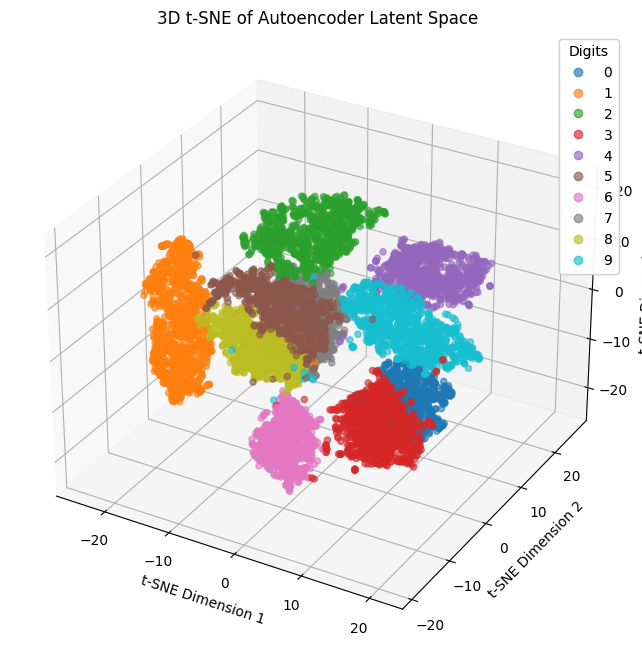

In [59]:
from mpl_toolkits.mplot3d import Axes3D



# Apply t-SNE with 3 components

tsne_3d = TSNE(n_components=3, random_state=0, perplexity=30, n_iter=1000)

latent_tsne_3d = tsne_3d.fit_transform(latent_vectors)



# Plot 3D t-SNE

fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(latent_tsne_3d[:,0], latent_tsne_3d[:,1], latent_tsne_3d[:,2],

                     c=labels, cmap='tab10', alpha=0.6)

legend = ax.legend(*scatter.legend_elements(), title="Digits")

ax.add_artist(legend)

ax.set_title('3D t-SNE of Autoencoder Latent Space')

ax.set_xlabel('t-SNE Dimension 1')

ax.set_ylabel('t-SNE Dimension 2')

ax.set_zlabel('t-SNE Dimension 3')

plt.show()


In [36]:
import numpy as np

import plotly.graph_objs as go



# Limit the number of points to reduce plot size

sample_size = 3000  # Reduce this number as needed

indices = np.random.choice(len(latent_vectors), size=sample_size, replace=False)



# Subsample the latent vectors and labels

latent_tsne_sampled = latent_tsne_3d[indices]

labels_sampled = np.array(labels)[indices]



# Create a scatter plot in Plotly

trace = go.Scatter3d(

    x=latent_tsne_sampled[:, 0], 

    y=latent_tsne_sampled[:, 1], 

    z=latent_tsne_sampled[:, 2],

    mode='markers',

    marker=dict(

        size=3,                      # Reduce marker size to save space

        color=labels_sampled,         # Set color to the digit labels

        colorscale='viridis',        # Use a simple colorscale

        opacity=0.8,

        colorbar=dict(title="Digits")

    ),

    text=[f"Digit: {label}" for label in labels_sampled],  # Hover info

)



# Create layout

layout = go.Layout(

    title="Interactive 3D t-SNE of Autoencoder Latent Space",

    scene=dict(

        xaxis_title='t-SNE Dimension 1',

        yaxis_title='t-SNE Dimension 2',

        zaxis_title='t-SNE Dimension 3'

    ),

    autosize=True

)



# Create figure and plot

fig = go.Figure(data=[trace], layout=layout)

fig.write_html("tsne_3d_plot.html")

pio.show(fig)


In [39]:
import subprocess



# Run Git commands to update the hosted plot

subprocess.run(["git", "add", "."])

subprocess.run(["git", "commit", "-m", "Updated"])

subprocess.run(["git", "push"])


CompletedProcess(args=['git', 'push'], returncode=0)

## VAE 

In [75]:
# Define device

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"Using device: {device}")



# Move data to device

train_noisy = train_noisy.to(device)

train_data = train_data.to(device)

test_noisy = test_noisy.to(device)

test_data = test_data.to(device)



# Define DataLoader with labels included
batch_size = 128

train_loader = DataLoader(torch.utils.data.TensorDataset(train_noisy, train_data, train_labels), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(torch.utils.data.TensorDataset(test_noisy, test_data, test_labels), batch_size=batch_size, shuffle=False)





Using device: cuda


In [76]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt



class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 128, kernel_size=3, stride=2, padding=1),  # [128,14,14]
            nn.ReLU(True),
            nn.Conv2d(128, 64, kernel_size=3, stride=2, padding=1), # [64,7,7]
            nn.ReLU(True),
            nn.Conv2d(64, 32, kernel_size=3, stride=2, padding=1),  # [32,4,4]
            nn.ReLU(True),
            nn.Conv2d(32, 16, kernel_size=3, stride=2, padding=1),  # [16,2,2]
            nn.ReLU(True)
        )
        
        self.fc_mu = nn.Linear(16*2*2, 20)  # Mean vector
        self.fc_var = nn.Linear(16*2*2, 20)  # Variance vector
        
        # Decoder
        self.fc_decode = nn.Linear(20, 16*2*2)
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 32, kernel_size=3, stride=2, padding=1, output_padding=1),  # [32,4,4]
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 64, kernel_size=3, stride=2, padding=1, output_padding=1),  # [64,8,8]
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 128, kernel_size=3, stride=2, padding=1, output_padding=1), # [128,16,16]
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 3, kernel_size=3, stride=2, padding=1, output_padding=1),  # [3,32,32]
            nn.Sigmoid()  # Output between 0 and 1
        )
    
    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def forward(self, x):
        # Encoder
        x = self.encoder(x)
        x = x.view(x.size(0), -1)
        
        # Latent variables
        mu = self.fc_mu(x)
        log_var = self.fc_var(x)
        z = self.reparameterize(mu, log_var)
        
        # Decoder
        x = self.fc_decode(z)
        x = x.view(x.size(0), 16, 2, 2)
        x = self.decoder(x)
        x = F.interpolate(x, size=(28, 28), mode='bilinear', align_corners=False)
        
        return x, mu, log_var

# Instantiate the model
vae_model = VAE()
print(vae_model)

# Move model to device
vae_model = vae_model.to(device)

# Define loss function and optimizer
def vae_loss(recon_x, x, mu, log_var):
    recon_loss = F.mse_loss(recon_x, x, reduction='sum')
    kld_loss = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return recon_loss + kld_loss

optimizer = optim.Adam(vae_model.parameters(), lr=1e-3, weight_decay=1e-5)


VAE(
  (encoder): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): ReLU(inplace=True)
  )
  (fc_mu): Linear(in_features=64, out_features=20, bias=True)
  (fc_var): Linear(in_features=64, out_features=20, bias=True)
  (fc_decode): Linear(in_features=20, out_features=64, bias=True)
  (decoder): Sequential(
    (0): ConvTranspose2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(64, 128, kernel_size=(3, 3), stride=(2, 2)

In [77]:
# Function to visualize output at certain epoch
def show_noisy_vs_denoised_at_epoch(epoch, model, num=5):
    # Switch model to evaluation mode
    model.eval()

    # Choose random test images
    idx = torch.randint(0, len(test_data), (num,))
    noisy_images = test_noisy[idx]

    with torch.no_grad():
        # Unpack the VAE output: recon_x is the reconstructed images
        denoised_images, _, _ = model(noisy_images)

    # Plot noisy and denoised images, passing the current epoch number
    show_noisy_vs_denoised(noisy_images.cpu(), denoised_images.cpu(), num=num, epoch=epoch)


Epoch [1/20], Train Loss: 12898.617087, Test Loss: 9660.784554
Epoch [2/20], Train Loss: 8547.345500, Test Loss: 6747.250108


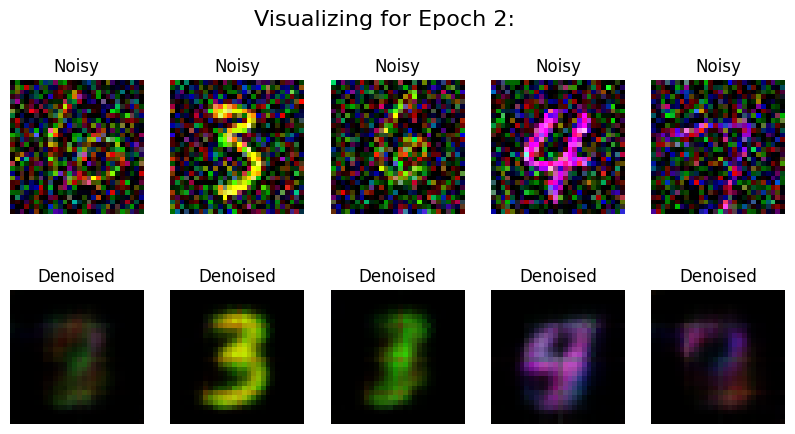

Epoch [3/20], Train Loss: 6000.749127, Test Loss: 5474.183727
Epoch [4/20], Train Loss: 5346.103958, Test Loss: 5174.135446


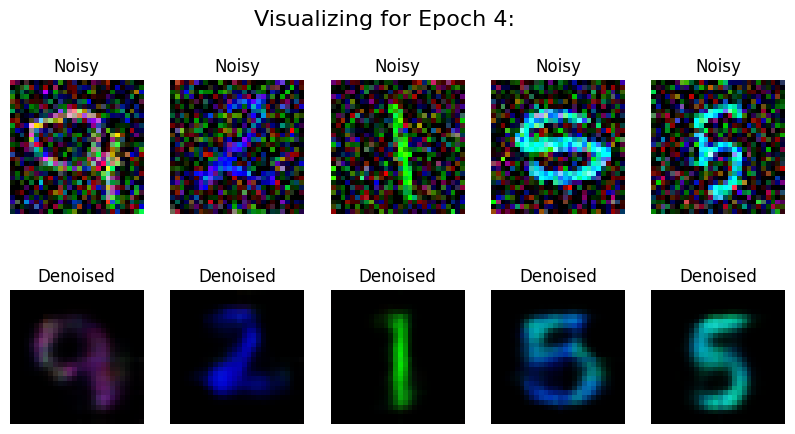

Epoch [5/20], Train Loss: 5093.013091, Test Loss: 4967.071113
Epoch [6/20], Train Loss: 4937.270160, Test Loss: 4823.643556


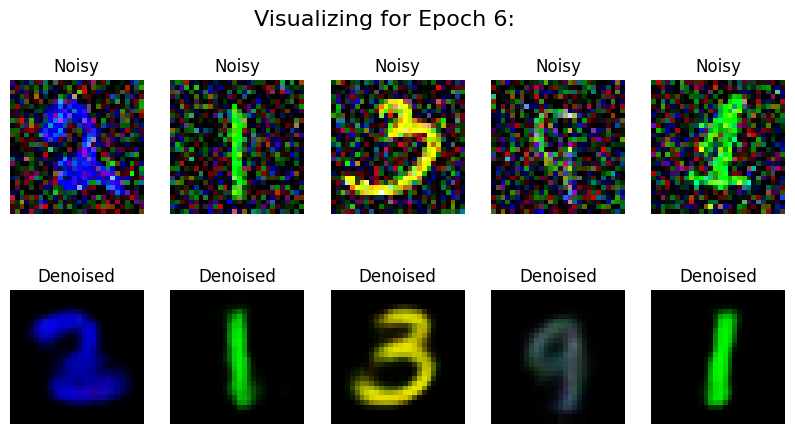

Epoch [7/20], Train Loss: 4827.073870, Test Loss: 4775.020125
Epoch [8/20], Train Loss: 4740.036924, Test Loss: 4653.818255


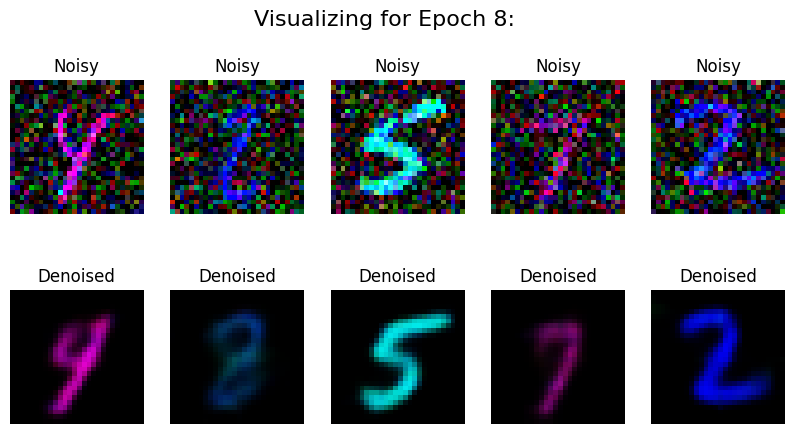

Epoch [9/20], Train Loss: 4657.140143, Test Loss: 4573.764143
Epoch [10/20], Train Loss: 4591.996601, Test Loss: 4541.390898


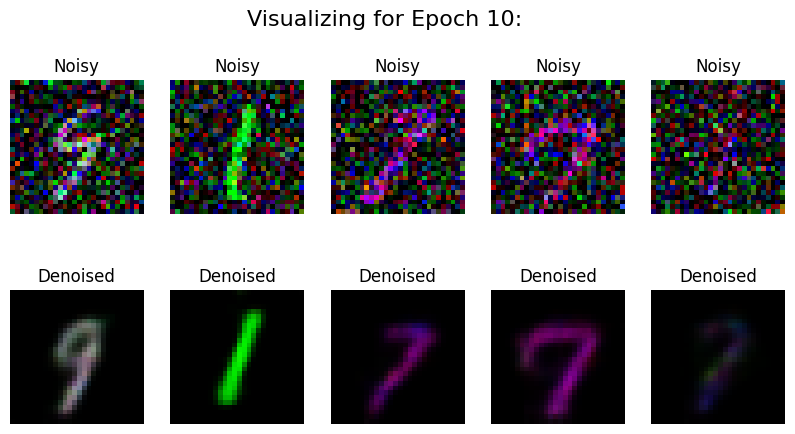

Epoch [11/20], Train Loss: 4539.808037, Test Loss: 4492.791252
Epoch [12/20], Train Loss: 4494.859476, Test Loss: 4427.915102


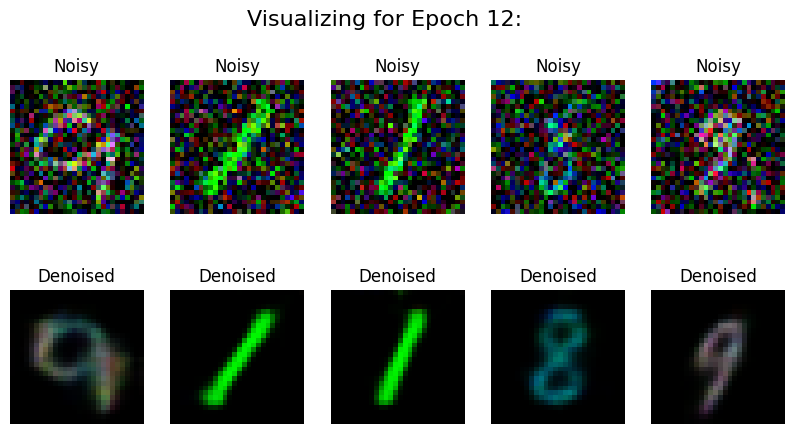

Epoch [13/20], Train Loss: 4455.288361, Test Loss: 4403.578439
Epoch [14/20], Train Loss: 4426.223826, Test Loss: 4354.934027


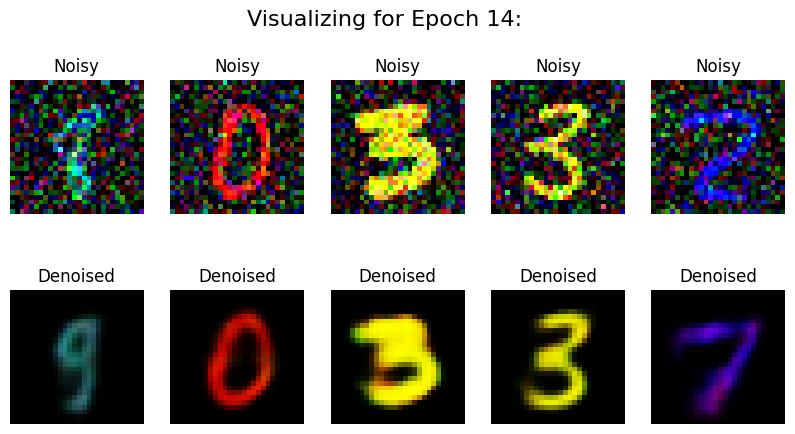

Epoch [15/20], Train Loss: 4397.082636, Test Loss: 4367.685854
Epoch [16/20], Train Loss: 4370.985546, Test Loss: 4336.360313


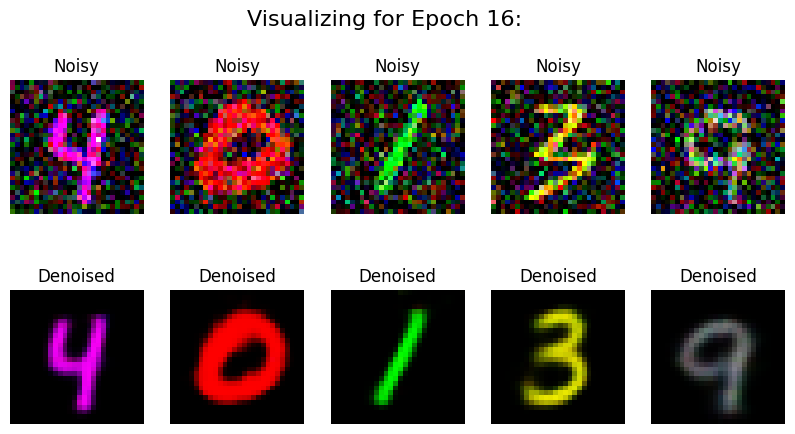

Epoch [17/20], Train Loss: 4346.131829, Test Loss: 4292.242141
Epoch [18/20], Train Loss: 4335.049462, Test Loss: 4309.132210


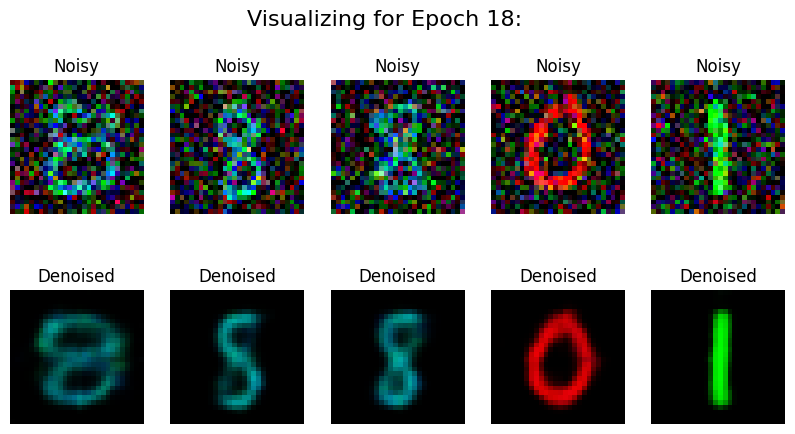

Epoch [19/20], Train Loss: 4312.911156, Test Loss: 4262.334755
Epoch [20/20], Train Loss: 4290.796328, Test Loss: 4253.732086


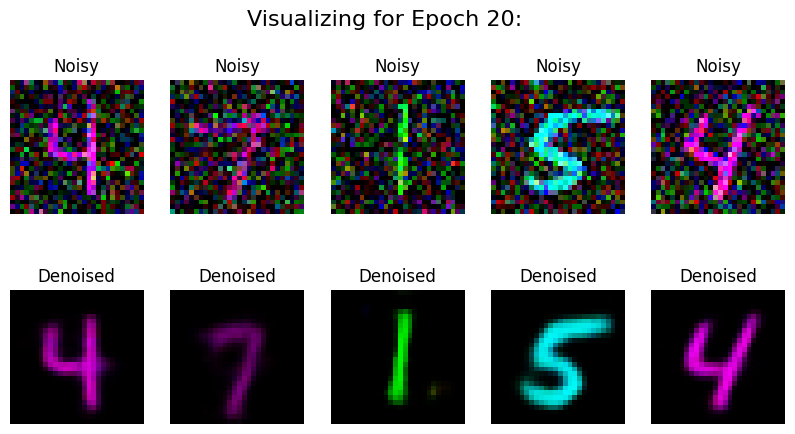

In [78]:
# Training Loop with visualization every 2 epochs
num_epochs = 50
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    vae_model.train()
    running_loss = 0.0
    for data in train_loader:
        inputs, targets, labels = data  # Unpack the noisy inputs, original targets, and labels
        inputs = inputs.to(device)
        targets = targets.to(device)
        labels = labels.to(device)  # If needed

        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass
        recon_x, mu, log_var = vae_model(inputs)
        loss = vae_loss(recon_x, targets, mu, log_var)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)
    
    # Evaluation on test set
    vae_model.eval()
    test_running_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            inputs, targets,labels = data
            inputs = inputs.to(device)
            targets = targets.to(device)
            recon_x, mu, log_var = vae_model(inputs)
            loss = vae_loss(recon_x, targets, mu, log_var)
            test_running_loss += loss.item() * inputs.size(0)
    
    test_epoch_loss = test_running_loss / len(test_loader.dataset)
    test_losses.append(test_epoch_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.6f}, Test Loss: {test_epoch_loss:.6f}")

    # Visualize only noisy and denoised images every 2 epochs
    if (epoch + 1) % 4 == 0:
        show_noisy_vs_denoised_at_epoch(epoch + 1, vae_model)



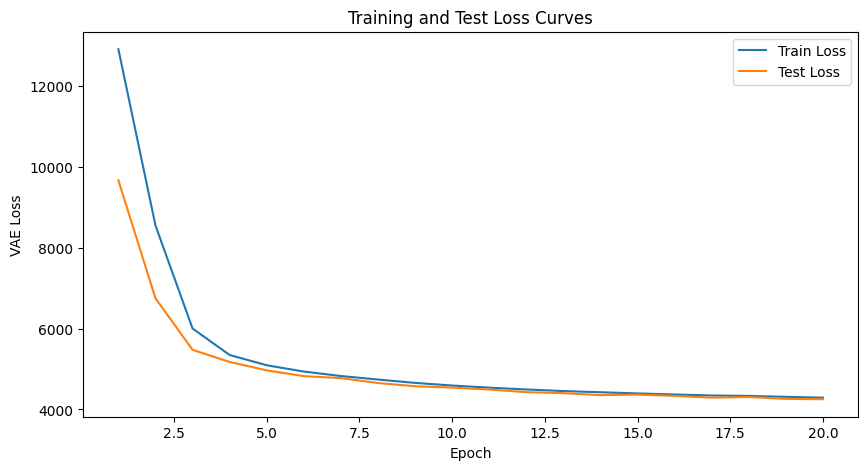

In [79]:

# Plot Loss Curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('VAE Loss')
plt.title('Training and Test Loss Curves')
plt.legend()
plt.show()

In [87]:
# Function to extract latent vectors from the VAE model
def get_latent_vectors(model, data_loader, device, num_batches=5):
    model.eval()  # Set model to evaluation mode
    latent_vectors = []
    labels = []

    with torch.no_grad():  # No need to compute gradients in evaluation
        for batch_idx, data in enumerate(data_loader):
            if batch_idx >= num_batches:  # Limit to the first 'num_batches' to save time
                break

            inputs, _, targets = data  # 'targets' are the true labels (assuming 3rd element in dataset)
            inputs = inputs.to(device)

            # Pass through the model to get the latent vector (mu)
            _, mu, _ = model(inputs)  # We only need the latent mean (mu) vector
            
            latent_vectors.append(mu.cpu().numpy())  # Collect latent vectors
            labels.append(targets.cpu().numpy())     # Collect labels

    # Concatenate all the batches
    latent_vectors = np.concatenate(latent_vectors, axis=0)
    labels = np.concatenate(labels, axis=0)

    return latent_vectors, labels

# Get latent vectors for the first 5 batches in the test_loader
latent_vectors, labels = get_latent_vectors(vae_model, test_loader, device, num_batches=100)

# Check the shape of the latent vectors and labels
print(f"Latent vectors shape: {latent_vectors.shape}")
print(f"Labels shape: {labels.shape}")


Latent vectors shape: (10000, 20)
Labels shape: (10000,)


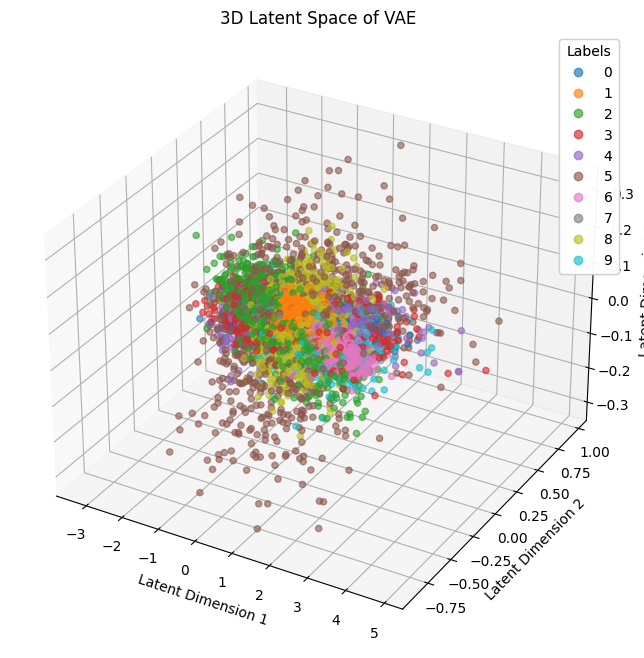

In [88]:
# 3D Latent Space Visualization
import matplotlib.pyplot as plt

def plot_latent_space_3d(latent_vectors, labels):
    fig = plt.figure(figsize=(10, 8))
    
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(latent_vectors[:, 0], latent_vectors[:, 1], latent_vectors[:, 2],
                         c=labels, cmap='tab10', alpha=0.6)
    
    # Add a legend
    legend = ax.legend(*scatter.legend_elements(), title="Labels")
    ax.add_artist(legend)
    
    # Labels and title
    ax.set_title('3D Latent Space of VAE')
    ax.set_xlabel('Latent Dimension 1')
    ax.set_ylabel('Latent Dimension 2')
    ax.set_zlabel('Latent Dimension 3')
    
    plt.show()

# Example usage: Plot in 3D
plot_latent_space_3d(latent_vectors, labels)


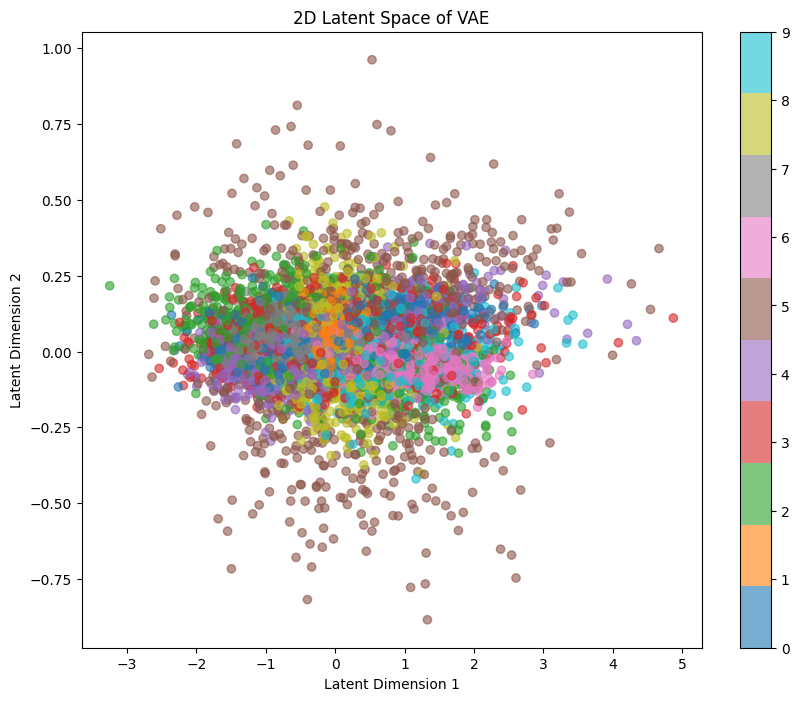

In [89]:
# 2D Latent Space Visualization
import matplotlib.pyplot as plt

def plot_latent_space_2d(latent_vectors, labels):
    plt.figure(figsize=(10, 8))
    
    plt.scatter(latent_vectors[:, 0], latent_vectors[:, 1], c=labels, cmap='tab10', alpha=0.6)
    plt.colorbar()
    
    # Labels and title
    plt.title('2D Latent Space of VAE')
    plt.xlabel('Latent Dimension 1')
    plt.ylabel('Latent Dimension 2')
    
    plt.show()

# Example usage: Plot in 2D
plot_latent_space_2d(latent_vectors, labels)
